In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [3]:
def read_graph():
    f = open('edges.txt','rb')
    G = nx.read_edgelist(f, delimiter = '\t', create_using = nx.Graph())
    return G
G = read_graph()
print('graph has %d nodes and %d edges' % (G.order(), G.number_of_edges()))

graph has 5062 nodes and 6060 edges


In [4]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)


Text(0.5, 0, 'rank')

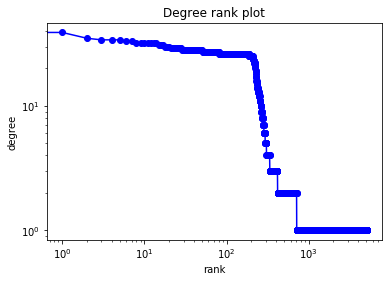

In [5]:
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")


In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5062
Number of edges: 6060
Average degree:   2.3943


In [7]:
print(nx.is_connected(G))

True


In [8]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.00047309040687414414


In [9]:
components = nx.connected_components(G)
largest_component = max(components, key=len)

In [10]:
largest_component

{'Meghan Trainor',
 'TEDxYouth@Tampa Bay',
 'Jacobin Magazine',
 'Oberlin College',
 'Healthy Mothers, Healthy Babies Coalition of Hawaii',
 'Georgia Tech Research Institute: Problem. Solved.',
 'Ezra Klein',
 'The Diplomatic Courier',
 'Ronald Reagan High School',
 'MyAfricaIs',
 'LearnZillion',
 'World Commission on Protected Areas - Marine',
 'United Nations Economic and Social Council',
 'The New York Times - Travel Show',
 'The Tindall Foundation',
 'Health and Environment Alliance (HEAL)',
 'Vanupié Officiel',
 'Leap Motion',
 'Rotaract CASA-ZENITH',
 'Duke University Fraternity and Sorority Life',
 'International Organization for Migration',
 'World Animal Protection Thailand องค์กรพิทักษ์สัตว์แห่งโลก',
 'Studio 360',
 'Chris Rosati',
 'FRAU Shoes - by Euroliving USA',
 'Essential Mall',
 'UCSF Community and Government Relations',
 'Ricoh Imaging France',
 'Cancer Research Institute',
 'TripAdvisor',
 'TedxGuatavita',
 'Bay Area Outreach & Recreation Program (BORP)',
 "Samaritan

In [11]:
sorted(G.degree(),key = lambda x:x[1],reverse=True)[:10]

[('Bill & Melinda Gates Foundation', 39),
 ('ONE', 39),
 ('NPR', 35),
 ('UN Women', 34),
 ('Women Deliver', 34),
 ('The New York Times', 34),
 ('I fucking love science', 33),
 ('Global Citizen', 33),
 ('Non-Profits on Facebook', 32),
 ('(RED)', 32)]

In [12]:
def get_subgraph(G, min_degree):
    degrees = G.degree()
    nodes_subgraph = [n for n,d in degrees if d > min_degree]
    subgraph = G.subgraph(nodes_subgraph)
    return subgraph
subgraph = get_subgraph(G, 1)

In [13]:
print('subgraph has %d nodes and %d edges' % 
      (subgraph.order(), subgraph.number_of_edges()))

subgraph has 712 nodes and 1710 edges


In [14]:
degree_dict = dict(subgraph.degree(subgraph.nodes()))

In [15]:
nx.set_node_attributes(subgraph, degree_dict, 'degree')

In [16]:
betweenness_dict = nx.betweenness_centrality(subgraph) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(subgraph) # Run eigenvector centrality
closeness_dict = nx.closeness_centrality(subgraph)
# Assign each to an attribute in your network
nx.set_node_attributes(subgraph, closeness_dict, 'closeness')
nx.set_node_attributes(subgraph, betweenness_dict, 'betweenness')
nx.set_node_attributes(subgraph, eigenvector_dict, 'eigenvector')

In [17]:
sorted(betweenness_dict.items(),key = lambda x:x[1],reverse=True)[:10]

[('Bill Gates', 0.2635346207899427),
 ('ONE', 0.11571944664728206),
 ('Big History Project', 0.10373118766762568),
 ('Bill & Melinda Gates Foundation', 0.08706210938477463),
 ('United Nations Millennium Campaign', 0.07738896880108564),
 ('Microsoft', 0.07431444586419586),
 ('TED', 0.07260680499559874),
 ('Melinda Gates', 0.0709355245882432),
 ('End Polio Now', 0.06883021512378577),
 ('United Nations Foundation', 0.058410651183918076)]

In [18]:
sorted(eigenvector_dict.items(),key = lambda x:x[1],reverse=True)[:10]

[('Bill Gates', 0.29214301288185085),
 ('Bill & Melinda Gates Foundation', 0.25290948059293056),
 ('Melinda Gates', 0.20708472905281933),
 ('ONE', 0.19860424926795853),
 ('United Nations Foundation', 0.17048688433357342),
 ('Gavi, the Vaccine Alliance', 0.15450288059837408),
 ('United Nations Millennium Campaign', 0.15248187322605078),
 ('TED', 0.14554760095152972),
 ('Global Citizen', 0.12952688470539903),
 ('RESULTS AU', 0.12899914598032733)]

In [19]:
sorted(closeness_dict.items(),key = lambda x:x[1],reverse=True)[:10]

[('Bill Gates', 0.4119351100811124),
 ('Melinda Gates', 0.35909090909090907),
 ('Bill & Melinda Gates Foundation', 0.3585476550680787),
 ('ONE', 0.3562124248496994),
 ('United Nations Millennium Campaign', 0.345985401459854),
 ('Malaria No More', 0.3401913875598086),
 ('United Nations Foundation', 0.3401913875598086),
 ('TED', 0.3393794749403341),
 ('RESULTS AU', 0.3392175572519084),
 ('Gavi, the Vaccine Alliance', 0.33632923368022705)]

In [19]:
from networkx.algorithms import community
import itertools    


In [20]:
k = 3

In [21]:
comp = community.girvan_newman(subgraph)

In [76]:
import community
partition = community.best_partition(subgraph)

In [85]:
partition.values()

dict_values([0, 1, 1, 2, 1, 3, 4, 5, 6, 6, 7, 6, 3, 7, 2, 2, 3, 0, 8, 8, 4, 6, 8, 3, 4, 9, 1, 0, 10, 3, 3, 7, 3, 6, 6, 4, 2, 2, 8, 9, 8, 4, 4, 8, 0, 8, 10, 2, 3, 7, 11, 2, 3, 6, 4, 9, 12, 6, 12, 10, 9, 4, 6, 6, 5, 3, 11, 1, 6, 3, 4, 6, 0, 1, 6, 0, 9, 4, 6, 8, 5, 2, 12, 1, 12, 0, 6, 0, 0, 1, 3, 8, 1, 6, 3, 4, 6, 13, 11, 4, 4, 2, 9, 10, 3, 10, 11, 4, 1, 6, 0, 3, 3, 8, 0, 9, 5, 11, 9, 6, 6, 0, 1, 2, 5, 0, 6, 10, 4, 2, 6, 12, 2, 3, 6, 12, 9, 12, 0, 4, 10, 6, 7, 8, 4, 3, 1, 8, 8, 3, 3, 3, 6, 0, 8, 1, 3, 6, 8, 3, 8, 9, 5, 6, 4, 1, 1, 3, 6, 4, 5, 0, 3, 5, 5, 5, 9, 6, 2, 4, 13, 2, 11, 0, 4, 7, 2, 6, 4, 4, 8, 11, 9, 7, 6, 1, 12, 6, 3, 4, 8, 3, 7, 7, 4, 3, 11, 4, 8, 3, 2, 4, 8, 1, 4, 7, 4, 2, 4, 4, 0, 3, 11, 4, 0, 12, 8, 8, 0, 2, 8, 1, 11, 4, 12, 4, 3, 8, 11, 3, 12, 11, 7, 8, 11, 0, 3, 6, 4, 0, 1, 0, 5, 3, 9, 12, 3, 0, 3, 7, 3, 4, 12, 7, 11, 8, 9, 9, 1, 3, 13, 12, 8, 7, 8, 2, 9, 1, 5, 4, 9, 1, 1, 7, 4, 3, 7, 3, 4, 4, 8, 6, 11, 6, 6, 1, 0, 6, 4, 8, 9, 8, 4, 12, 3, 3, 4, 9, 7, 10, 0, 4, 11, 9, 6, 

In [78]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

In [79]:
comm1 = getKeysByValue(partition,0)

In [26]:
labels = comm1[:3]

In [107]:
def comm_network(graph, draw_thresh=1, label_thresh=31,
                 min_node_sz=30, max_node_sz=200):
    """
    Draw a graph, filtering the nodes and labels based on degree.
    The size of nodes is proportional to degree.
    
    graph...........a networkx graph
    draw_thresh.....only draw nodes that have degree greater than this.
    label_thresh....only label nodes that have degree greater than this.
    min_node_size...smallest node size
    max_node_size...biggest node size
    """
    partition = community.best_partition(subgraph)
    degrees = graph.degree()
    degree_values = dict(graph.degree).values()
    labels = {n: n for n, d in degrees if d > label_thresh}
    new_labe = dict(labels).values()
    plt.figure(figsize=(20,20))
    nodes_to_draw = [name for name, degree in degrees if degree > draw_thresh]
    maxdegree = max(degree_values)
    sz_range = max_node_sz - min_node_sz
    sizes = [min_node_sz + (1. * degrees[n] / maxdegree * sz_range)
             for n in nodes_to_draw]
    pos = nx.spring_layout(subgraph)
    nx.draw_networkx_nodes(subgraph, pos, node_size=30, cmap=plt.cm.RdYlBu, label= new_labe,node_color=list(partition.values()))
    nx.draw_networkx_edges(subgraph, pos, alpha=0.3)

    plt.axis("off")
    plt.show()
    


In [ ]:
subgraph = graph.subgraph(nodes_to_draw)

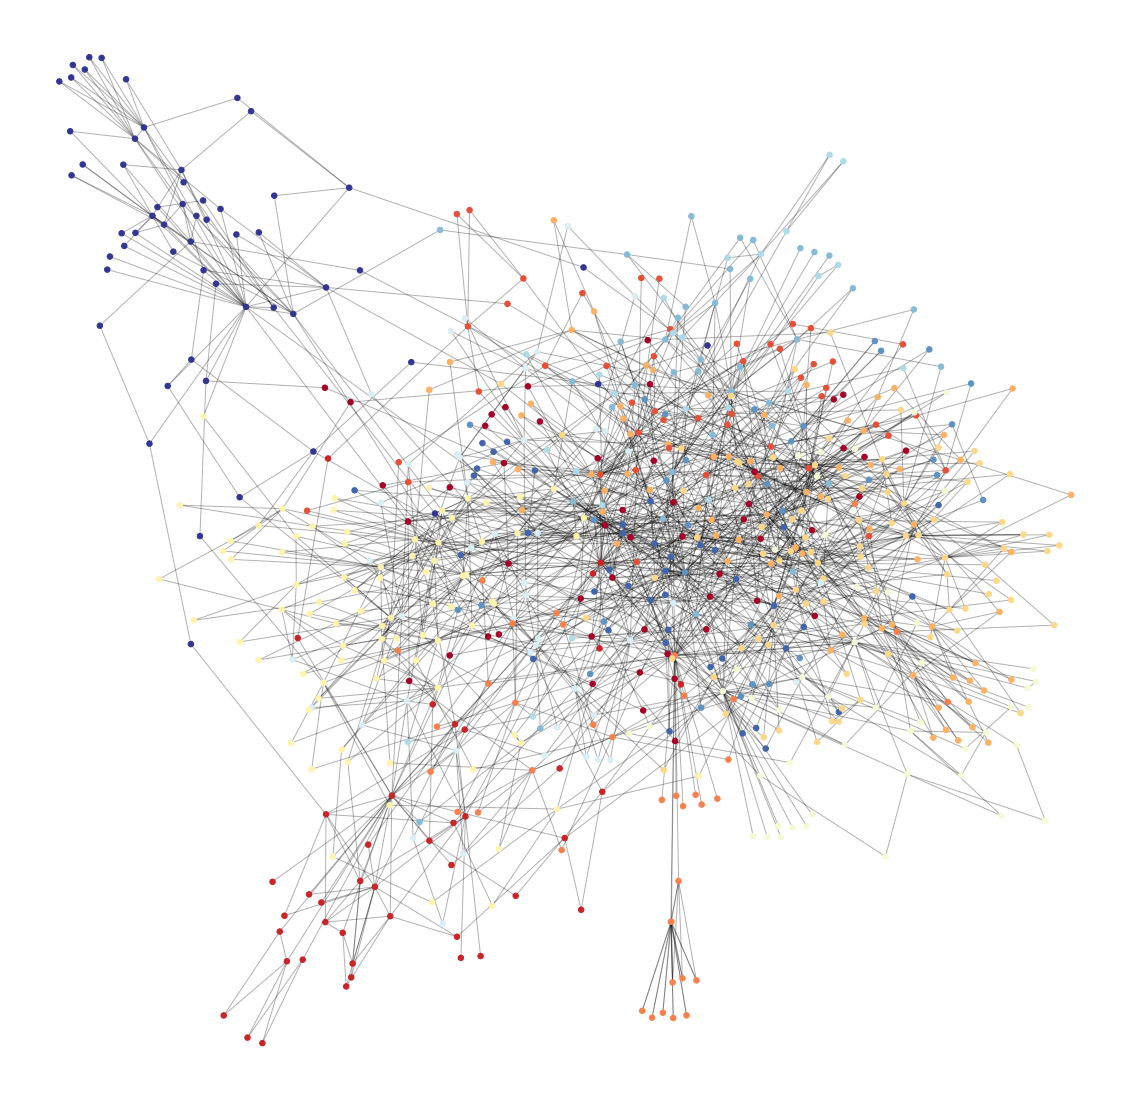

In [108]:
comm_network(subgraph)

In [27]:
labels

['WE CARE Solar', 'Nelson Mandela', 'Bill & Melinda Gates Foundation']

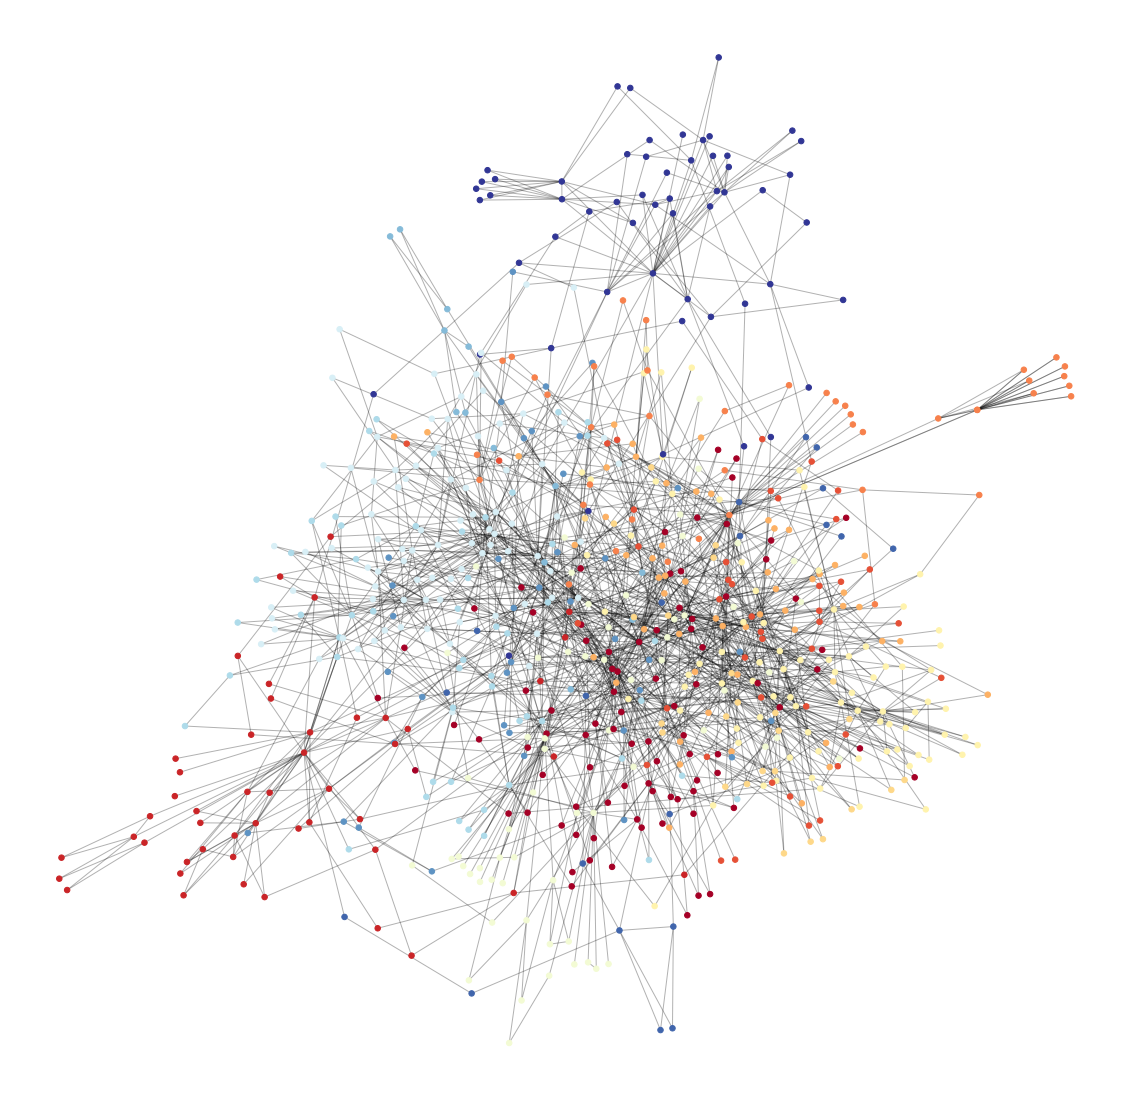

In [47]:
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(subgraph, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
plt.show(subgraph)

In [31]:
cc=nx.average_clustering(G) 
cc 

c=nx.clustering(G) 
c  

{'Scholastic': 0.050724637681159424,
 'Scholastic Librarians': 0,
 'Scholastic Art & Writing Awards': 0,
 'National Council for Teachers of English': 0,
 'Scholastic Australia': 0,
 'This is Teen': 0,
 'Scholastic Parents': 0.1794871794871795,
 'Hunger Games Page': 0,
 'Scholastic Teachers': 0.42857142857142855,
 'Reading Is Fundamental (RIF)': 0,
 'Scholastic Reading Club': 1.0,
 'International Literacy Association': 0,
 'The Hunger Games': 1.0,
 'Klutz Books': 0,
 'READ 180': 1.0,
 'Reach Out and Read': 0,
 'Arthur A. Levine Books': 1.0,
 'WordGirl': 1.0,
 'Scholastic Canada': 1.0,
 'Figment': 0,
 'LitWorld': 0,
 'National Student Poets Program': 0,
 'Scholastic Book Fairs': 1.0,
 'Clifford The Big Red Dog': 1.0,
 'Big History Project': 0.046153846153846156,
 'National Geographic Learning': 0.002849002849002849,
 'National Geographic Education': 0.009230769230769232,
 'STEMconnector': 0.002849002849002849,
 'Utah Science Teachers Association': 0,
 'Minnesota Council for the Social St

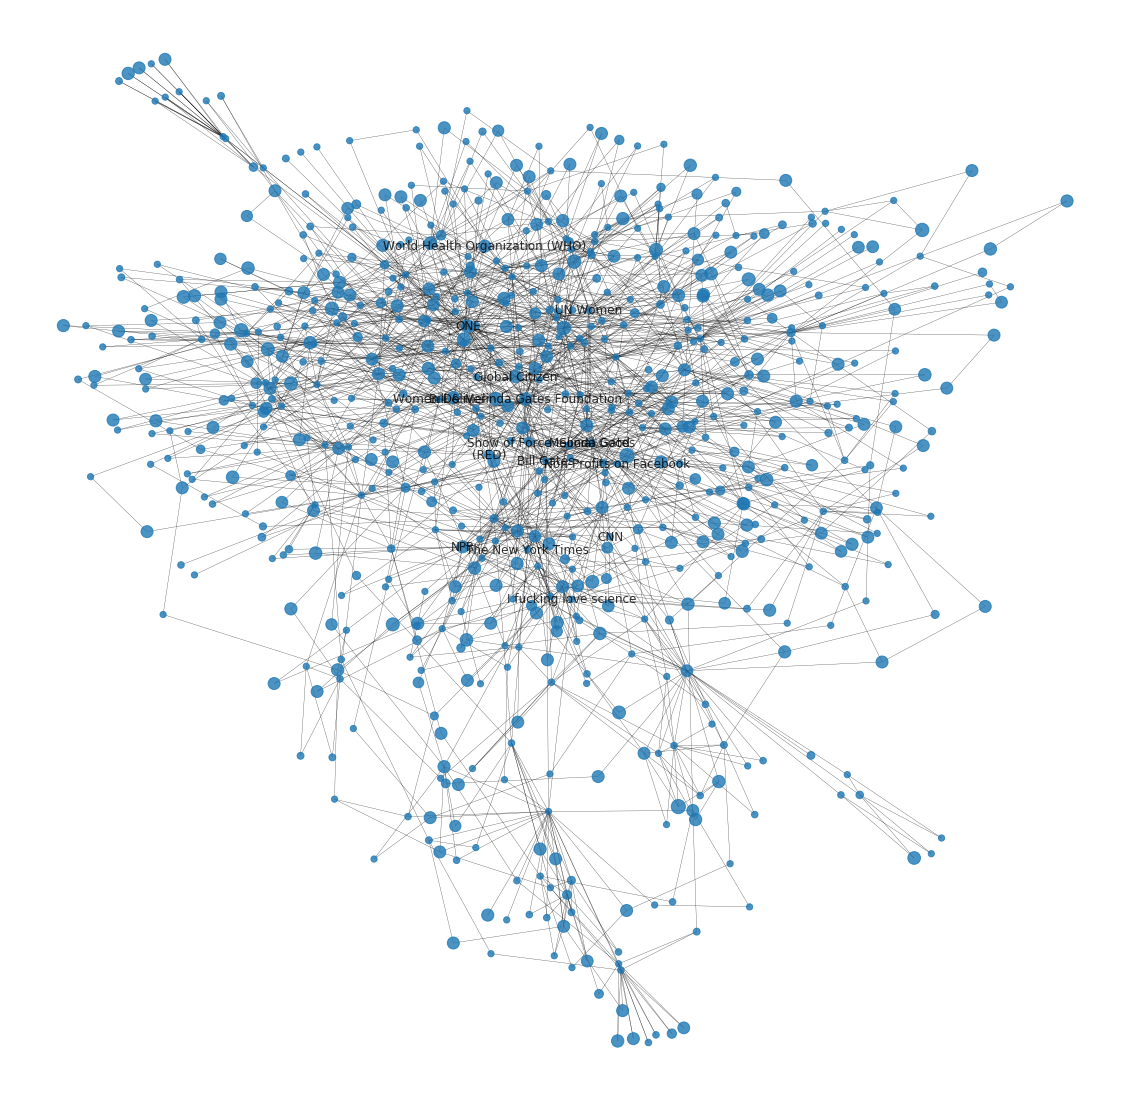

In [90]:
def draw_network(graph, draw_thresh=1, label_thresh=31,
                 min_node_sz=30, max_node_sz=200):
    """
    Draw a graph, filtering the nodes and labels based on degree.
    The size of nodes is proportional to degree.
    
    graph...........a networkx graph
    draw_thresh.....only draw nodes that have degree greater than this.
    label_thresh....only label nodes that have degree greater than this.
    min_node_size...smallest node size
    max_node_size...biggest node size
    """
    degrees = graph.degree()
    degree_values = dict(graph.degree).values()
    labels = {n: n for n, d in degrees if d > label_thresh}
    plt.figure(figsize=(20,20))
    nodes_to_draw = [name for name, degree in degrees if degree > draw_thresh]
    maxdegree = max(degree_values)
    sz_range = max_node_sz - min_node_sz
    sizes = [min_node_sz + (1. * degrees[n] / maxdegree * sz_range)
             for n in nodes_to_draw]
    pos = nx.spring_layout(subgraph)
    nx.draw_networkx(subgraph, alpha=0.8, width=.3,
                     labels=labels, node_size=sizes, pos = pos)
    plt.axis("off")
    plt.show()
    
draw_network(G)

NameError: name 'graph' is not defined

In [37]:
import community

In [38]:
communities = community.greedy_modularity_communities(subgraph)

AttributeError: module 'community' has no attribute 'greedy_modularity_communities'

In [32]:
c = list(communities)

NameError: name 'communities' is not defined

In [33]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

    

NameError: name 'communities' is not defined

In [34]:
nx.set_node_attributes(subgraph, modularity_dict, 'modularity')


In [35]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

NameError: name 'communities' is not defined

In [36]:
[c for i,c in enumerate(communities) if len(c)>2]

NameError: name 'communities' is not defined